#### Gensim word vector visualization of various word vectors

In [5]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [39]:
glove_file = datapath('glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

/tmp/ipykernel_32831/2036025860.py:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400000, 100)

In [40]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [15]:
model["bread"]

array([-0.66146  ,  0.94335  , -0.72214  ,  0.17403  , -0.42524  ,
        0.36303  ,  1.0135   , -0.14802  ,  0.25817  , -0.20326  ,
       -0.64338  ,  0.16632  ,  0.61518  ,  1.397    , -0.094506 ,
        0.0041843, -0.18976  , -0.55421  , -0.39371  , -0.22501  ,
       -0.34643  ,  0.32076  ,  0.34395  , -0.7034   ,  0.23932  ,
        0.69951  , -0.16461  , -0.31819  , -0.34034  , -0.44906  ,
       -0.069667 ,  0.35348  ,  0.17498  , -0.95057  , -0.2209   ,
        1.0647   ,  0.23231  ,  0.32569  ,  0.47662  , -1.1206   ,
        0.28168  , -0.75172  , -0.54654  , -0.66337  ,  0.34804  ,
       -0.69058  , -0.77092  , -0.40167  , -0.069351 , -0.049238 ,
       -0.39351  ,  0.16735  , -0.14512  ,  1.0083   , -1.0608   ,
       -0.87314  , -0.29339  ,  0.68278  ,  0.61634  , -0.088844 ,
        0.88094  ,  0.099809 , -0.27161  , -0.58026  ,  0.50364  ,
       -0.93814  ,  0.67576  , -0.43124  , -0.10517  , -1.2404   ,
       -0.74353  ,  0.28637  ,  0.29012  ,  0.89377  ,  0.6740

In [11]:
model.most_similar("natty")

[('dashiki', 0.6157426834106445),
 ('rumpled', 0.5733786225318909),
 ('pinstriped', 0.5676769018173218),
 ('sweatsuit', 0.5602096319198608),
 ('dapper', 0.5478768944740295),
 ('billowy', 0.5395511388778687),
 ('knickers', 0.5386159420013428),
 ('chinos', 0.5351909399032593),
 ('bluejeans', 0.5318582653999329),
 ('zippered', 0.530754566192627)]

In [12]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.927285373210907),
 ('clinton', 0.896000325679779),
 ('mccain', 0.8875633478164673),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933662533760071),
 ('dole', 0.7851964831352234),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488929629325867),
 ('kerry', 0.7472624182701111)]

In [13]:
model.most_similar('banana')

[('coconut', 0.7097253203392029),
 ('mango', 0.7054824829101562),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420575976371765),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [16]:
model.most_similar("china")

[('beijing', 0.8378757834434509),
 ('chinese', 0.8370456695556641),
 ('taiwan', 0.8251469135284424),
 ('mainland', 0.7728948593139648),
 ('korea', 0.7463889122009277),
 ('hong', 0.7441108226776123),
 ('japan', 0.7408212423324585),
 ('vietnam', 0.7311980724334717),
 ('shanghai', 0.7294734120368958),
 ('thailand', 0.721368670463562)]

In [69]:
model.most_similar(negative="good")

[('atentamente', 0.6840597987174988),
 ('brett.clanton@chron.com', 0.6830008029937744),
 ('+10.00', 0.6809892058372498),
 ('ryryryryryry', 0.6789417862892151),
 ('ngabo', 0.6737895607948303),
 ('juta', 0.6687334179878235),
 ('purva.patel@chron.com', 0.6658638715744019),
 ('methoni', 0.6640544533729553),
 ('kilakarai', 0.6625359654426575),
 ('jenalia.moreno@chron.com', 0.6624385118484497)]

In [14]:
model.most_similar(negative='banana')

[('shunichi', 0.49618104100227356),
 ('ieronymos', 0.4736502170562744),
 ('pengrowth', 0.4668096601963043),
 ('höss', 0.4636845588684082),
 ('damaskinos', 0.4617849290370941),
 ('yadin', 0.4617374837398529),
 ('hundertwasser', 0.4588957726955414),
 ('ncpa', 0.4577339291572571),
 ('maccormac', 0.4566109776496887),
 ('rothfeld', 0.4523947238922119)]

In [17]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [18]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

![Analogy](imgs/word2vec-king-queen-composition.png)

In [20]:
analogy("china","chinese","ethiopia")

'ethiopian'

In [21]:
analogy('japan', 'japanese', 'australia')

'australian'

In [22]:
analogy('australia', 'beer', 'france')

'champagne'

In [23]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [24]:
analogy('tall', 'tallest', 'long')

'longest'

In [25]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [27]:
analogy("tall","tallest","long")

'longest'

In [26]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def display_pca_scatterplot(model, words=None, sample=0):
    # Check if the model is a KeyedVectors instance
    if hasattr(model, 'wv'):
        keyed_vectors = model.wv
    else:
        keyed_vectors = model
    
    if words is None:
        if sample > 0:
            words = np.random.choice(list(keyed_vectors.key_to_index.keys()), sample)
        else:
            words = list(keyed_vectors.key_to_index.keys())
    
    word_vectors = np.array([keyed_vectors[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10, 10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x, y) in zip(words, twodim):
        plt.text(x + 0.05, y + 0.05, word)
    plt.show()

In [78]:
%matplotlib inline

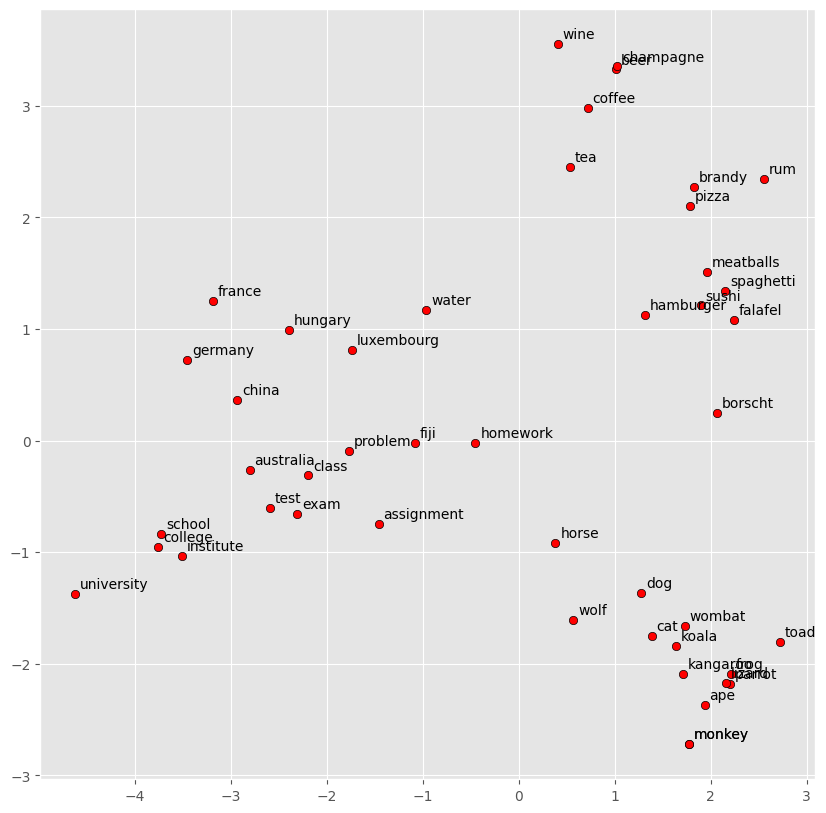

In [79]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

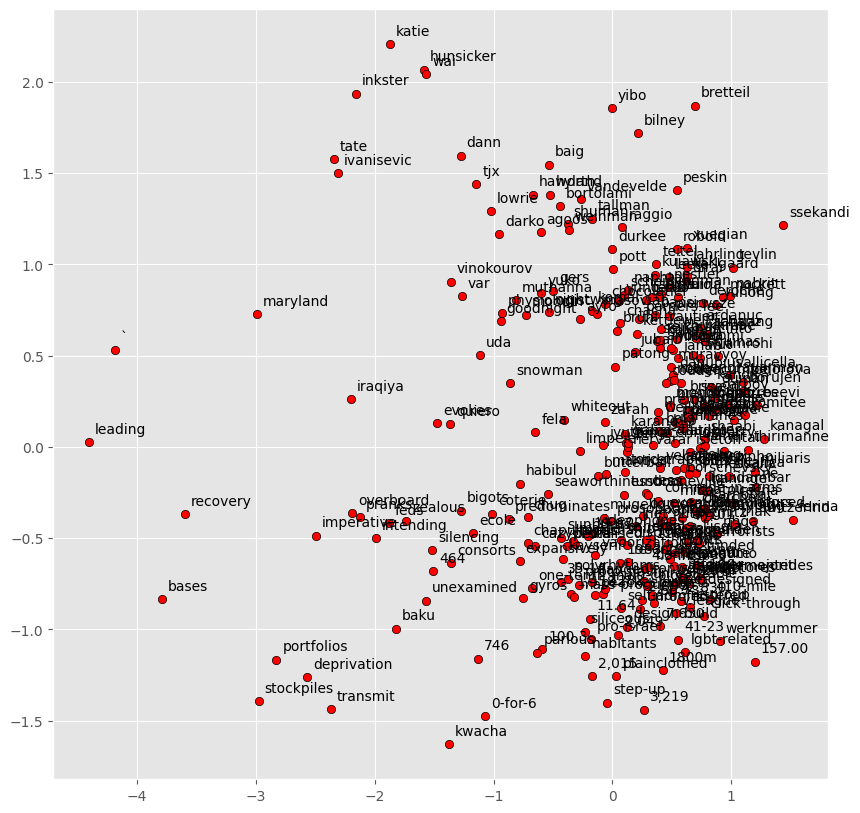

In [85]:
display_pca_scatterplot(model,words=None,sample=300)